In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Bitcoin.csv")
ValuesShow=pd.notnull(data["Open"])
data[ValuesShow]
data.head(10)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(4572257, 8)

In [ ]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.572257e+06,3.330541e+06,3.330541e+06,3.330541e+06,3.330541e+06,3.330541e+06,3.330541e+06,3.330541e+06
mean,1.462739e+09,4.056085e+03,4.058902e+03,4.053083e+03,4.056039e+03,9.615569e+00,3.065300e+04,4.056035e+03
std,7.934625e+07,4.104887e+03,4.108199e+03,4.101295e+03,4.104831e+03,3.160992e+01,1.070309e+05,4.104835e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.393902e+09,4.215500e+02,4.217200e+02,4.213700e+02,4.215500e+02,3.857831e-01,3.830488e+02,4.215309e+02
50%,1.462874e+09,2.389260e+03,2.390980e+03,2.386350e+03,2.389270e+03,1.940000e+00,2.936700e+03,2.388988e+03
75%,1.531458e+09,7.583000e+03,7.588590e+03,7.577480e+03,7.582760e+03,7.430356e+00,1.933611e+04,7.583018e+03
max,1.600042e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,1.044599e+07,1.966330e+04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [ ]:
data1=data.drop(["High","Low","Open","Close"],axis=1) 
data1.head(10)


  

,Timestamp,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN


In [ ]:
data.dtypes


Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
data.fillna("Unknown")

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2,4.39
1,1325317980,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,1325318040,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,1325318100,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,1325318160,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.4,10325.9,10324.4,10325.9,0.081143,837.754,10324.4
4572253,1600041420,10331.4,10332,10326.7,10332,0.572817,5918.03,10331.4
4572254,1600041480,10327.2,10331.5,10321.3,10331.5,2.48991,25711.2,10326.2
4572255,1600041540,10330,10334.8,10328.6,10334.8,4.57266,47253.7,10334


In [ ]:
data.tail(100)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4572157,1600035660,10319.66,10320.36,10317.15,10317.18,4.427796,45695.378730,10320.117297
4572158,1600035720,10317.18,10318.75,10317.15,10317.81,7.851103,81003.556548,10317.475065
4572159,1600035780,10315.00,10316.29,10314.07,10316.29,0.024910,256.956865,10315.335518
4572160,1600035840,10316.30,10316.38,10316.30,10316.38,0.042969,443.279235,10316.304727
4572161,1600035900,10321.42,10321.45,10312.41,10312.41,3.720341,38382.183333,10316.846561
...,...,...,...,...,...,...,...,...
4572252,1600041360,10324.35,10325.89,10324.35,10325.89,0.081143,837.754188,10324.419779
4572253,1600041420,10331.41,10331.97,10326.68,10331.97,0.572817,5918.028741,10331.444396
4572254,1600041480,10327.20,10331.47,10321.33,10331.47,2.489909,25711.238323,10326.175283
4572255,1600041540,10330.02,10334.78,10328.64,10334.78,4.572660,47253.747619,10333.972651


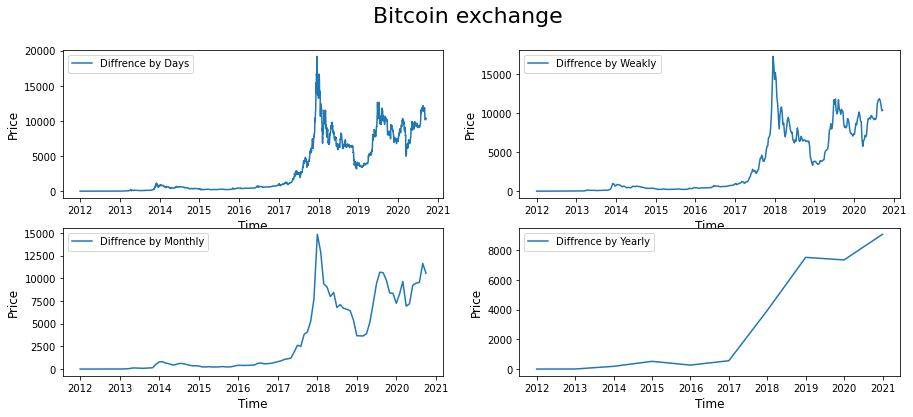

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
data.Timestamp=pd.to_datetime(data.Timestamp,unit='s')
data.index=data.Timestamp
data=data.resample('D').mean()
data_week=data.resample('W').mean()
data_month=data.resample('M').mean()
data_year=data.resample('A-DEC').mean()
fig = plt.figure(figsize=[15, 6])
plt.suptitle('Bitcoin exchange', fontsize=22)
plt.subplot(221)
plt.plot(data.Weighted_Price, '-',label='Daily')
plt.legend(["Diffrence by Days"],loc="upper left")
plt.xlabel('Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(222)
plt.plot(data_week.Weighted_Price, '-',label='Weakly')
plt.legend(["Diffrence by Weakly"],loc="upper left")
plt.xlabel('Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(223)
plt.plot(data_month.Weighted_Price, '-',label='Monthly')
plt.legend(["Diffrence by Monthly"],loc="upper left")
plt.xlabel('Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(224)
plt.plot(data_year.Weighted_Price, '-',label='Yearly')
plt.legend(["Diffrence by Yearly"],loc="upper left")
plt.xlabel('Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

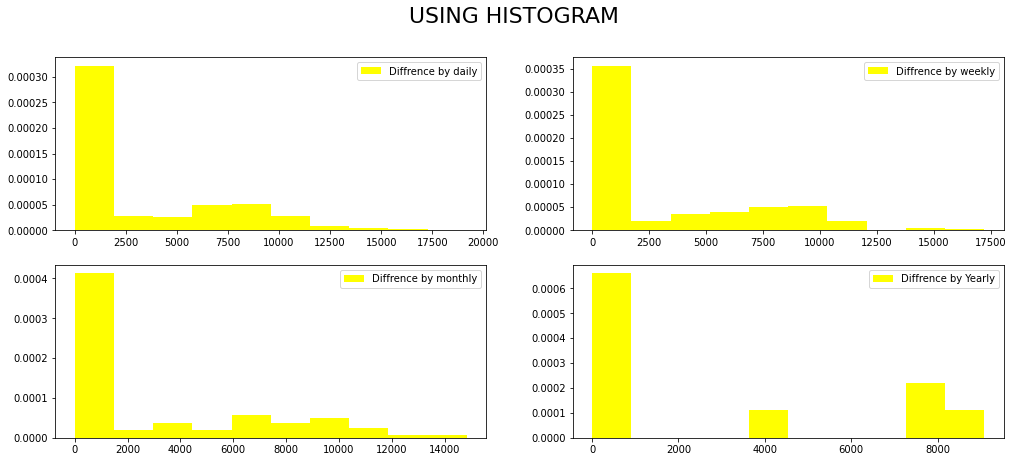

In [ ]:

fig = plt.figure(figsize=[17,7])
plt.suptitle('USING HISTOGRAM', fontsize=22)
plt.subplot(221)
plt.hist(data.Weighted_Price,density=True,histtype='bar',color="yellow",label="Diffrence by daily")
plt.legend(["Diffrence by daily"],loc="upper right")
plt.subplot(222)
plt.hist(data_week.Weighted_Price,density=True,histtype='bar',color="yellow",label="Diffrence by weekly")
plt.legend(["Diffrence by weekly"],loc="upper right")
plt.subplot(223)
plt.hist(data_month.Weighted_Price,density=True,histtype='bar',color="yellow",label="Diffrence by monthly")
plt.legend(["Diffrence by monthly"],loc="upper right")
plt.subplot(224)
plt.hist(data_year.Weighted_Price,density=True,histtype='bar',color="yellow",label="Diffrence by yearly")
plt.legend(["Diffrence by Yearly"],loc="upper right")



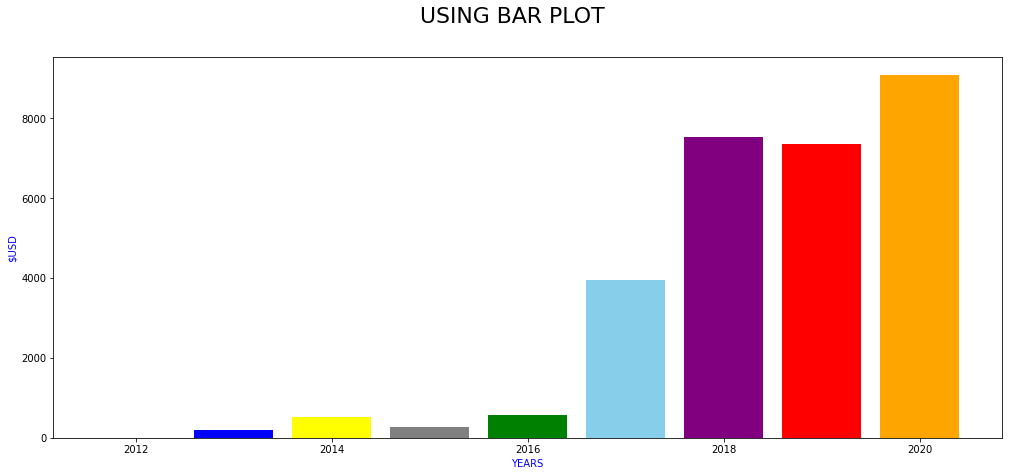

In [ ]:
fig = plt.figure(figsize=[17,7])
plt.suptitle('USING BAR PLOT', fontsize=22)
years=[2012,2013,2013,2014,2015,2016,2017,2018,2019,2020]
plt.bar(years,data_year.Weighted_Price,color=["red","orange","blue","yellow","gray","green","skyblue","purple"])
plt.xlabel("YEARS",color="blue")
plt.ylabel("$USD",color="blue")
plt.show()

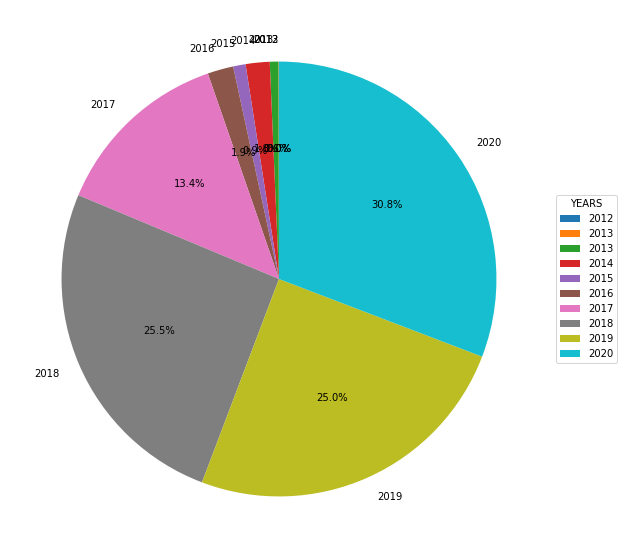

In [ ]:
fig = plt.figure(figsize =(25, 10)) 
plt.pie(data_year.Weighted_Price,labels = years,startangle=90,radius = 1,autopct = '%1.1f%%') 
plt.legend(years, title ="YEARS", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.show()

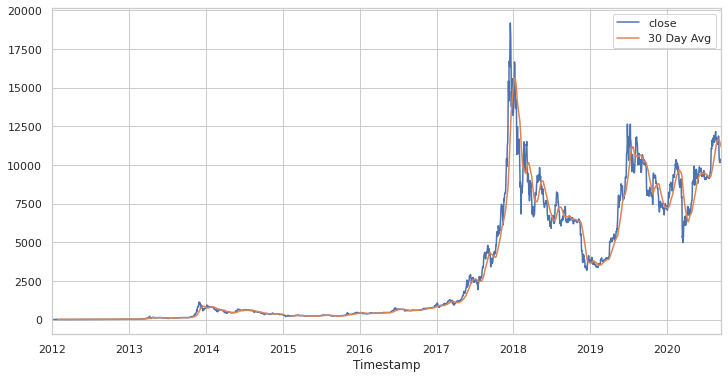

In [ ]:
sns.set()
sns.set_style('whitegrid')
data['Close'].plot(figsize=(12,6),label='close')
data['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dickey Fuller test value of P is = 0.617866
The time series is not stationary


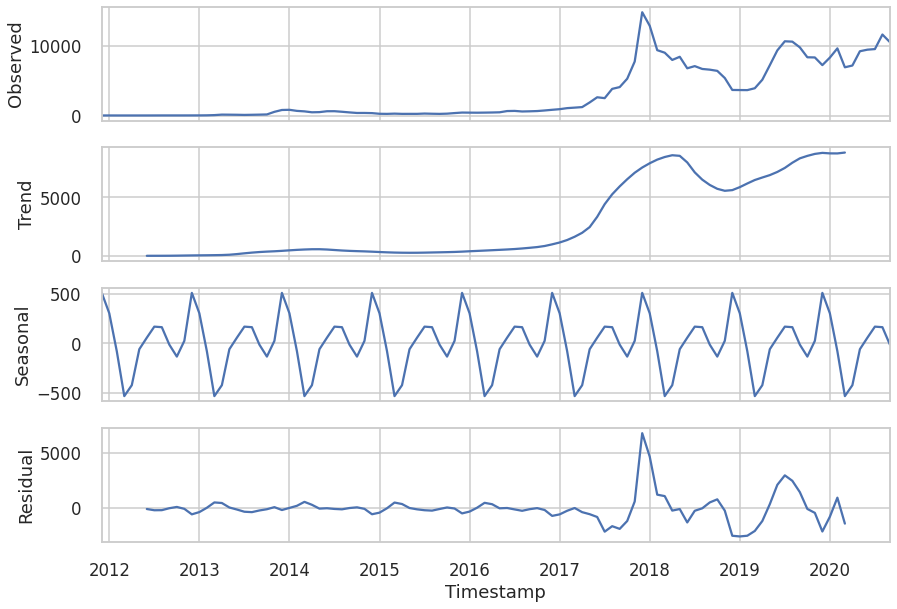

In [ ]:

import statsmodels.api as st
plt.style.use('seaborn-poster')
sns.set_style('whitegrid')
sns.set_context('talk')
st.tsa.seasonal_decompose(data_month.Weighted_Price).plot()
result=st.tsa.stattools.adfuller(data_month.Weighted_Price)[1]
print("Dickey Fuller test value of P is = %f"%result)
if result>0.05:
    print("The time series is not stationary")
else:
    print("The time series is stationary")
plt.show()

<Figure size 1080x216 with 0 Axes>

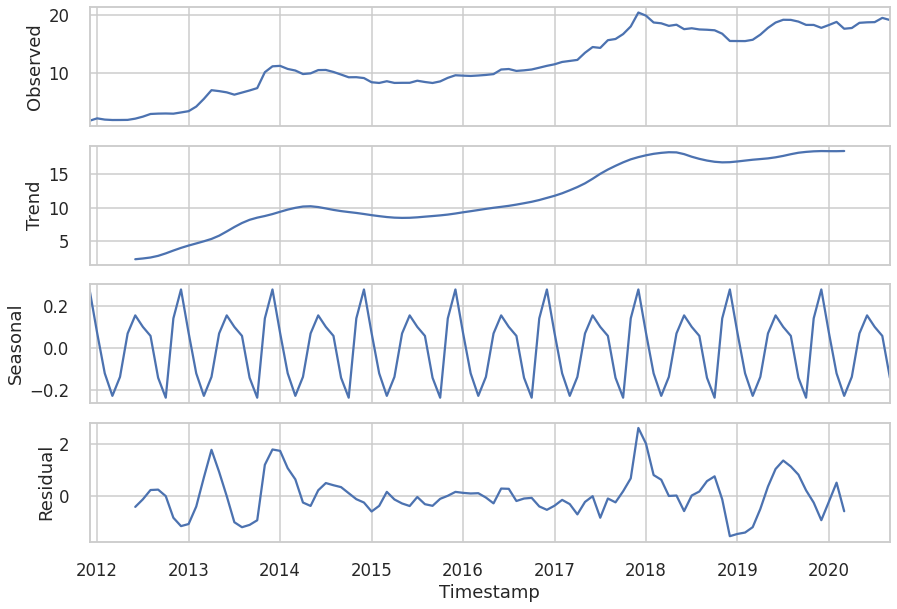

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Dickey Fuller test value of P is = 0.617866
The time series is not stationary


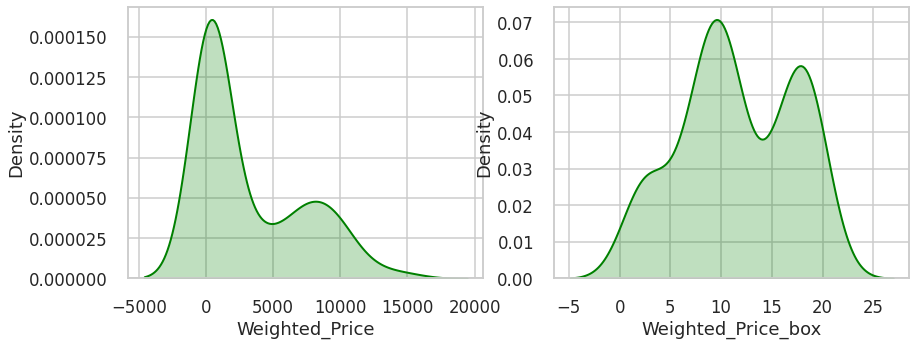

In [ ]:
from scipy import stats

plt.style.use('seaborn-poster')
sns.set_context("talk")
data_month['Weighted_Price_box'], lmbda = stats.boxcox(data_month.Weighted_Price)


plt.figure(figsize=[15,3])
st.tsa.seasonal_decompose(data_month.Weighted_Price_box).plot() 
plt.show() 
fig,ax=plt.subplots(1,2)
sns.distplot(data_month.Weighted_Price,hist=False,kde=True, kde_kws = {'shade': True, 'linewidth': 2},label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(data_month.Weighted_Price_box,hist=False,kde=True, kde_kws = {'shade': True, 'linewidth': 2},label = "Normal", color ="green", ax = ax[1])
fig.set_figheight(5)
fig.set_figwidth(14)
result=st.tsa.stattools.adfuller(data_month.Weighted_Price)[1]
print("Dickey Fuller test value of P is = %f"%result)
if result>0.05:
    print("The time series is not stationary")
else:
    print("The time series is stationary")



Dickey Fuller test value of P is = 0.288535
The time series is not stationary


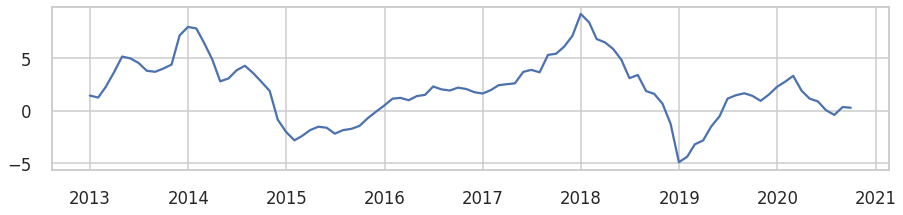

In [ ]:
data_month['prices_box_diff'] = data_month.Weighted_Price_box - data_month.Weighted_Price_box.shift(12)
result=st.tsa.stattools.adfuller(data_month.prices_box_diff[12:])[1]
print("Dickey Fuller test value of P is = %f"%result)
if result>0.05:
    print("The time series is not stationary")
else:
    print("The time series is stationary")
plt.figure(figsize=[15,3])
plt.plot(data_month['prices_box_diff'])

Dickey Fuller test value of P is = 0.000002
The time series is stationary


<Figure size 1080x504 with 0 Axes>

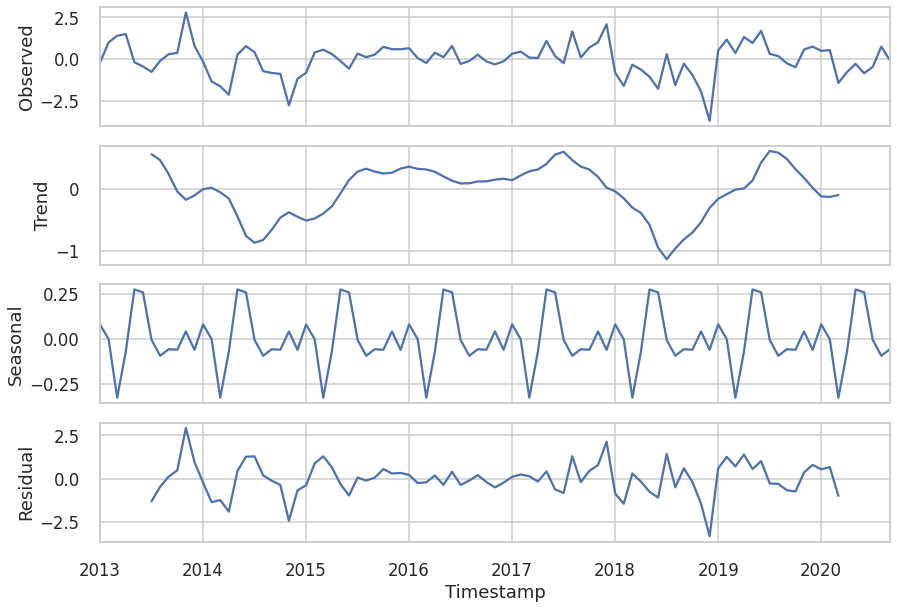

In [ ]:

plt.style.use('seaborn-poster')
sns.set_context("talk")
data_month['prices_box_diff2'] = data_month.prices_box_diff - data_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))
st.tsa.seasonal_decompose(data_month.prices_box_diff2[13:]).plot()  
result=st.tsa.stattools.adfuller(data_month.prices_box_diff2[13:])[1]
print("Dickey Fuller test value of P is = %f"%result)
if result>0.05:
    print("The time series is not stationary")
else:
    print("The time series is stationary")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


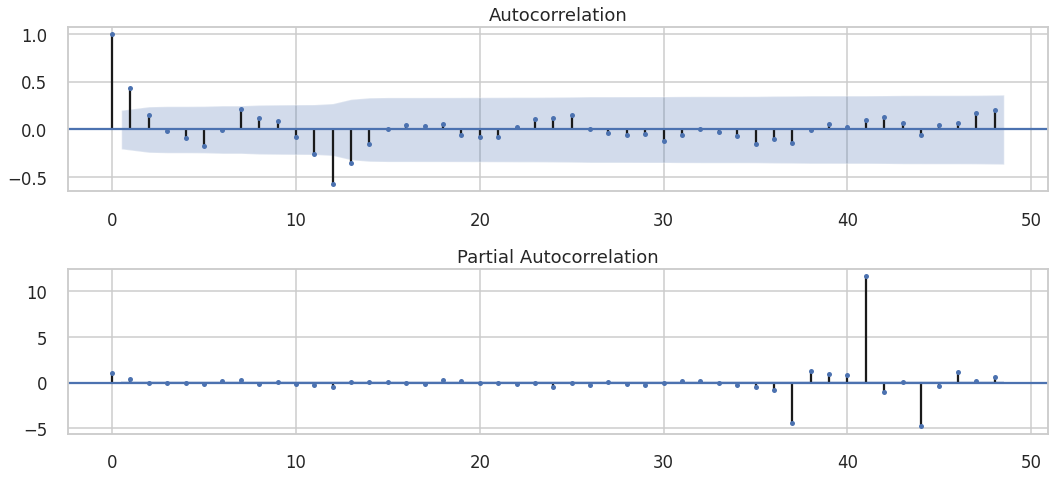

In [ ]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
st.graphics.tsa.plot_acf(data_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
st.graphics.tsa.plot_pacf(data_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
import warnings
from itertools import product
warnings.filterwarnings('ignore')
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=st.tsa.statespace.SARIMAX(data_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


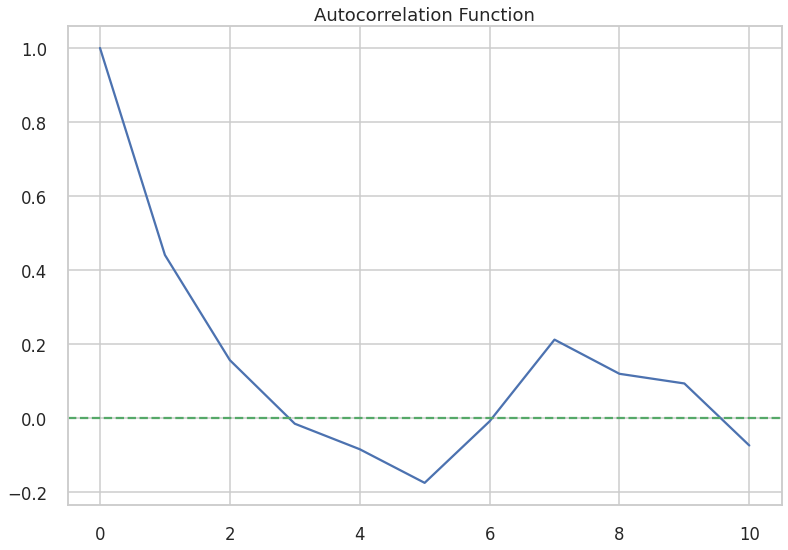

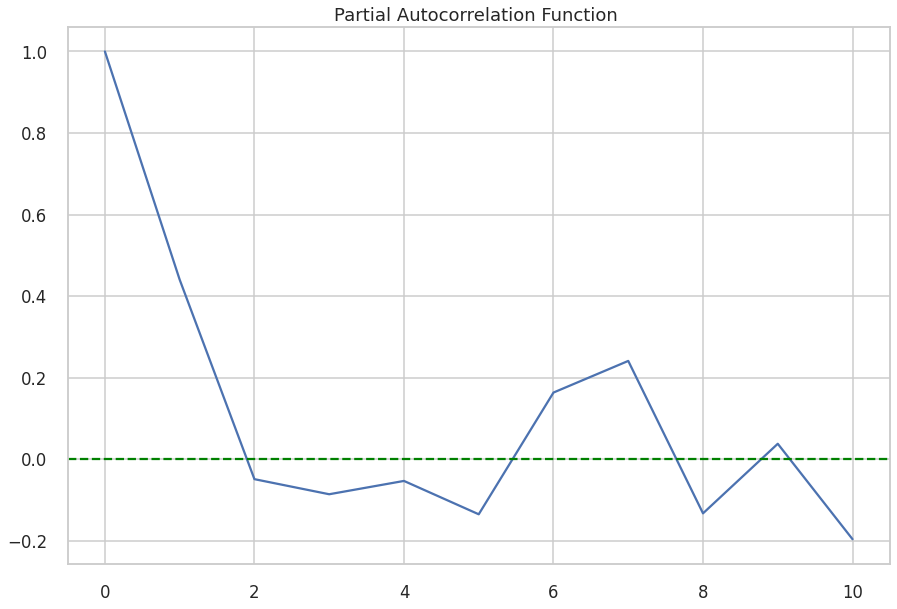

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
lag_acf = acf(data_month.prices_box_diff2[13:], nlags=10)
lag_pacf = pacf(data_month.prices_box_diff2[13:], nlags=10, method='ols')
plt.subplot(1,1,1)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='g')
plt.title('Autocorrelation Function')
plt.show()
plt.subplot(1,1,1)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.title('Partial Autocorrelation Function ')
plt.tight_layout()
plt.show()


In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
11  (0, 1, 2, 1)  198.825567
23  (1, 0, 2, 1)  198.882307
19  (1, 0, 0, 1)  199.158172
21  (1, 0, 1, 1)  199.434530
7   (0, 1, 0, 1)  199.518064
                                 Statespace Model Results                                 
Dep. Variable:                 Weighted_Price_box   No. Observations:                  106
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -94.413
Date:                            Wed, 15 Dec 2021   AIC                            198.826
Time:                                    09:49:13   BIC                            211.489
Sample:                                12-31-2011   HQIC                           203.939
                                     - 09-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000000


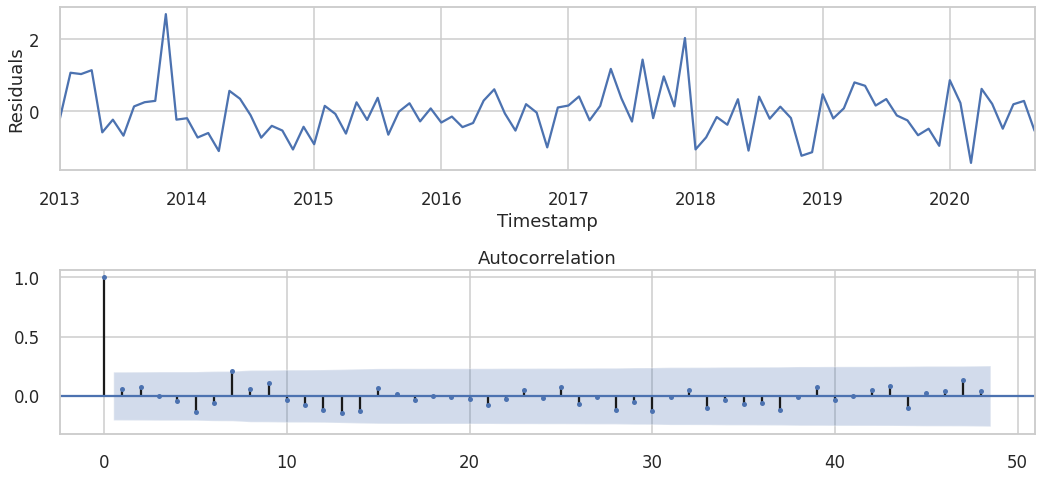

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
st.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
print("Dickey–Fuller test:: p=%f" % st.tsa.stattools.adfuller(best_model.resid[13:])[1])
plt.tight_layout()
plt.show()

In [ ]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [ ]:
%matplotlib notebook
df_month2 = data_month[['Weighted_Price']]
date_list = [datetime(2020, 9, 30), datetime(2020, 10, 31), datetime(2020, 11, 30), datetime(2020, 12, 31), 
             datetime(2021, 1,31 ), datetime(2020, 2, 28), datetime(2020, 3, 31), datetime(2020, 4, 30),
             datetime(2021, 5, 31)]
future = pd.DataFrame(index=date_list, columns= data_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=170), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')

plt.show()



<IPython.core.display.Javascript object>

In [ ]:
ax=plt.gca()
line = ax.lines[0]
line.get_xdata()
line.get_ydata()


masked_array(data=[4.471602874575, 6.2085498123059155, 5.252527072756106,
                   4.9620211990449254, 4.976547123859593,
                   5.041348403638742, 5.971144794997857,
                   7.795287229292067, 10.91709950021526,
                   11.410970875607145, 11.596921702788725,
                   11.325438846097855, 13.154020325357793,
                   15.321195383090851, 25.815375057142525,
                   57.225955901907895, 127.8246703011545,
                   117.86553711240609, 105.46034549033662,
                   85.43186328284433, 103.47003358221261,
                   124.84516363021045, 152.76766784686208,
                   528.3389315267121, 794.1407584191583,
                   818.9883091013933, 663.8657910765811, 594.519242794569,
                   462.2731063829302, 485.7556880289459,
                   613.0103976671891, 618.415684927233, 537.1183909734924,
                   445.0186208895708, 363.87564594681754,
                   36

In [ ]:
data['Price_After_Month']=data['Close'].shift(-30)

In [ ]:
from sklearn import preprocessing
data.dropna(inplace=True)
X=data.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=data['Price_After_Month']

In [ ]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 91.0965 %


In [ ]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])

The prediction is: 678.2082704185872 But the real value is: 711.2223599999987
